In [2]:
# Adapted from Professor Jose Rafael Toro Gomez's code.
# Author: María Alejandra Vargas Torres
import numpy as np
import pandas as pd
from collections import ChainMap
import collections
import matplotlib.pyplot as plt
import time

def formato_grafica(ax, fig, titulo= "", x_label= "", y_label= "", leyenda=False, xlim=[None, None], ylim=[None, None]):
    
    ax.set_title(titulo)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    
    # Utilizarlo si se necesita alguna rotación en los labels de los ejes
#     ax.set_xticklabels(ax.get_xticks(), rotation = 0)
#     ax.set_yticklabels(ax.get_yticks(), rotation = 0)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    # Grid de la gráfica
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        ax.legend(loc='best', fontsize= 7)

    fig.tight_layout()


In [5]:
s = time.time()   
# Dimensiones
ancho = 5
alto = 5

# Parámetros
Reynolds = 200
UU = 0.1
LL = ancho
visc = (UU*LL)/Reynolds
denso = 2.7
tao = 3*visc + 0.5

Uo = np.array([0.1,0])

# Coeficiente de la probabilidad de equilibrio
w0 = 4/9
w1 = 1/9
w2 = 1/36

coefW = np.array([w0, w1, w1, w1, w1, w2, w2, w2, w2])


In [6]:
# Estados de velocidad 
estadosvel = np.array([[0, 0], [1, 0], [0, 1],
                       [-1, 0], [0, -1], [1, 1], 
                       [-1, 1], [-1, -1], [1, -1]])

#backward = np.array([1, 5, 4, 3, 2, 7, 8, 6, 9])-1
#backward_2 = np.array([1, 4, 5, 2, 3, 8, 9, 6, 7])-1

backward = np.array([1, 4, 5, 2, 3, 8, 9, 6, 7])-1
backward_2 = np.array([1, 4, 5, 2, 3, 8, 9, 6, 7])-1

nueve = np.arange(0, 9)

back = np.array([[2, 3, 4, 6, 7],
                 [2, 4, 5, 8, 9], 
                 [3, 4, 5, 7, 8]])-1
                 

In [7]:
a = [1,2]

In [8]:
a[0] = 4

In [9]:
a

[4, 2]

In [10]:
con = np.array_split(nueve, 2)
c_1 = con[0]
c_2 = con[1]

c_1, c_2

(array([0, 1, 2, 3, 4]), array([5, 6, 7, 8]))

In [11]:
# Posiciones vecinas paredes 
# 1 = izq , 2 = der, 3 = inf, 4 = sup
pvec = []

def join_list(part_1, part_2):
    return np.hstack((part_1, part_2)) - estadosvel[:, np.newaxis]

first = np.arange(2, alto).reshape((alto-2),1)-1
second = (np.zeros(len(first))+1).reshape((alto-2),1)-1
pvec.append(join_list(first, second))

first = np.arange(2, alto).reshape((alto-2),1)-1
second = (np.zeros(len(first))+ ancho).reshape((alto-2),1)-1
pvec.append(join_list(first, second))

second = np.arange(2, ancho).reshape((alto-2),1)-1
first = (np.zeros(len(second))+ alto).reshape((alto-2),1)-1
pvec.append(join_list(first, second))

second = np.arange(2, ancho).reshape((alto-2),1)-1
first = (np.zeros(len(second))+ 1).reshape((alto-2),1)-1
pvec.append(join_list(first, second))

pvec = np.array(pvec).astype(int)

data = np.arange(1, alto-1)
first = data[:, np.newaxis]
first = np.repeat(first, len(first))[:, np.newaxis]
second = np.array(list(data)*(alto-2))[:, np.newaxis]
pvecina = join_list(first, second)


In [12]:
# Propabilidad en las paredes
def ProbEqSymb(u):
    mul = (estadosvel*u).sum(axis=1)
    return  denso*coefW*(1 + 3*(mul) + 9/2*(mul)**2 - 3/2*(u@u))

# Generar probabilidades
def fUo(x1, a):
    val = x1 < ancho/2 
    value = []
    for i in range(len(x1)): 
        if (val[i] == True):
            value.append(np.tanh(x1[i]/a))
        else:
            value.append(np.tanh((ancho - x1[i])/a))

    return np.array(value)


In [13]:
# Generación de la probabilidad de Uo
def genProbUo(Uo):
  x1 = np.arange(1,ancho+1)
  Ux = fUo(x1, 20).reshape(x1.size,1)*Uo

  pu = []
  for i in Ux:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
      pu.append(ProbEqSymb(i))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

  pu = np.array(pu).transpose()
  pu[[2, 1, 4, 3, 8, 6],:] = pu[[1, 2, 3, 4, 6, 8], :]
  
  return pu 


In [14]:
def create_table(pe):
    return np.zeros((alto-1, ancho))+pe

# Probabilidad en las paredes
pe = ProbEqSymb(np.array([0, 0]))

def ProbEq01():
    T = []
    for i in pe:
        T.append(pd.DataFrame(create_table(i)))
    return np.array(T)


In [15]:
def genProbEqo(Uo):
    puo = genProbUo(Uo)
    T = ProbEq01()
    TT = []
    for i in range(len(T)):
        TT.append(np.vstack((puo[i], T[i])))
    return np.stack(TT, axis=0)


In [16]:
nump = np.arange(0,3)
J = np.arange(0,9)
def extraerparedes(prob):
    T_ = []
    for i in nump:
        data = []
        for j in J:
            if (i == 0):
                data.append(prob[j][1:-1,0])
            elif(i == 1):
                data.append(prob[j][1:-1,-1])
            elif(i == 2):
                data.append(prob[j][-1])
        T_.append(data)

    return np.array(T_, dtype=object)


In [17]:
# Adicionar paredes
def adicionaparedes(probint, paredes0, Uo):
    new_list = []
    psup = genProbUo(Uo)
    temp1 = []
    for i in range(len(J)):
        temp = np.hstack((paredes0[0][i].reshape(len(paredes0[0][0]), 1), probint[i],paredes0[1][i].reshape(len(paredes0[0][0]), 1)))
        b =  np.hstack((pe[i],paredes0[2][i],pe[i]))
        temp1 = [psup[i]]
        for i in range(len(temp)):
            temp1.append(temp[i])
        temp1.append(b)
        new_list.append(np.array(temp1, dtype=object))
    return np.array(new_list, dtype=object)


In [18]:
# Lattice Boltzmann ###
# Colisión
def Colision(prob, probEqO, Uo):
    paredes0 = extraerparedes(prob)

    probint = []
    probEqint = []
    probtemp = []
    for i in range(len(prob)):

        p_int = prob[i][1:alto-1,1:ancho-1]
        p_Eqint = probEqO[i][1:alto-1,1:ancho-1]
        p_temp = p_int - 1/tao*(p_int - p_Eqint)

        probint.append(np.array(p_int))
        probEqint.append(np.array(p_Eqint))
        probtemp.append(np.array(p_temp))

    probint = probint
    probEqint = probEqint
    probtemp = probtemp

    return adicionaparedes(probtemp, paredes0, Uo)


In [19]:
def order_data(rparedes, back):
    return np.take_along_axis(rparedes, back, axis=0)


In [20]:
def rebotes1(prob, numpared):
    dir = back[numpared]
    dirb = order_data(backward, dir)
    dirb_2 = order_data(backward_2, dir)

    a = prob[dirb]

    filter = pvec[numpared][dirb_2]

    lista = []
    for i in range(len(a)):
        f = filter[i,:,0]
        f2 = filter[i,:,1]
        b = a[i][f]
        list_ = []
        for j in range(len(f2)):
            c = b[j][f2[j]]
            list_.append(c)
        lista.append(list_)
    
    filter_values = dict(zip(dir, lista))
    cdir = np.setdiff1d(nueve, dir)

    return filter_values, cdir


In [21]:
def rebotes2(probC):
    col = [[],[],[]]
    col_2 = [[],[],[]]
    _col = {}
    for i in range(3):
        colu, cdir = rebotes1(probC, i)    
        col_2[i].append(colu)
        for j in range(0, len(cdir)):
            cen_ = []
            _col = {}
            if (i == 0):            
                val = probC[i][1:alto-1]
                for k in val:
                    cen_.append(k[0])
                _col[cdir[j]] = cen_
                col[i].append(_col)
            elif (i == 1):            
                val = probC[i][1:alto-1]
                for k in val:
                    cen_.append(k[ancho-1])
                _col[cdir[j]] = cen_
                col[i].append(_col)
            elif (i == 2):            
                val = probC[i][alto-1]        
                _col[cdir[j]] = val[1:ancho-1].flatten('F').tolist()
                col[i].append(_col)
    
    return col, col_2


In [22]:
def rebotes(probC):
    rparedes_ = rebotes2(probC)
 
    lista_ = []

    for j in range(3):
        l = np.array([])
        for i in range(2):
            l = np.append(l, rparedes_[i][j])
        lista_.append(l)

    rparedes = []
    for i in range(3):
        a = dict(ChainMap(*lista_[i]))
        b = dict(collections.OrderedDict(sorted(a.items())))

        rparedes.append(np.vstack(list(b.values())))

    rparedes = np.array(rparedes)
    return rparedes


In [23]:
# Transporte interior ####
def TransInterior(prob):
    probTrint = []

    for i in range(len(prob)):
        val = pvecina[i]
        pro = np.hstack(np.vsplit(prob[i][val[:,0],val[:,1]][:, np.newaxis], ancho-2)).transpose()
        probTrint.append(pro)
    return probTrint


In [24]:
# Transporte paredes
def p12(prob):
    l_in = [[], []]
    for i in range(0,2):
        for j in range(len(pvec[0])):
            z1 = pvec[i][j,:,0]
            z2 = pvec[i][j,:,1]
            
            c_z1 = (z1 >= 0) & (z1 <= alto - 1) & (z2 >= 0) & (z2 <= ancho - 1)

            if (list(c_z1) == list([True]*len(z1))):
                l_in[i].append(prob[j][z1[c_z1], z2[c_z1]])
            else: 
                z1 += estadosvel[j,0]
                z2 += estadosvel[j,1]
                l_in[i].append(prob[j][z1, z2])
    return l_in


In [25]:
def p3(prob):
    l_in = []
    i = 2
    for j in range(len(pvec[0])):
        z1 = pvec[i][j,:,0]
        z2 = pvec[i][j,:,1]
        
        c_z1 = (z1 >= 0) & (z1 <= alto - 1) & (z2 >= 0) & (z2 <= ancho - 1)

        if (list(c_z1) == list([True]*len(z1))):
            l_in.append(prob[j][z1[c_z1], z2[c_z1]])
        else: 
            z1 += estadosvel[j,0]
            z2 += estadosvel[j,1]
            l_in.append(prob[j][z1, z2])
    return l_in


In [26]:
def TransPared(prob):
    p12_ = p12(prob)
    p3_ = p3(prob)
    p12_.append(p3_)
    return p12_


In [27]:
# Transporte
def Transporte(prob, Uo):
    rparedes = rebotes(prob)
    probinto = []
    for i in range(len(prob)):
        probinto.append(np.vstack(prob[i][1:-1])[:,1:-1])
    prob1 = adicionaparedes(probinto, rparedes, Uo)
    probint = []
    for i in range(len(prob1)):
        probint.append(np.vstack(prob1[i][1:-1])[:,1:-1])
    probTrint = TransInterior(prob1)
    tparedes = TransPared(prob1)

    return adicionaparedes(probTrint, tparedes, Uo)


In [28]:
def genDensProm(prob):
    return sum(prob)


In [29]:
def genVelProm(prob, Dens):
    ovp = []
    for i in range(len(prob)):
        d = np.vstack(estadosvel[i][:, np.newaxis, np.newaxis] * prob[i].flatten())
        d1 = d[0]
        d2 = d[1]
        ovp.append(list(map(list, zip(d1,d2))))
    temp = []
    for i in range(len(ovp)):
        temp.append(np.vsplit(np.array(ovp[i]),ancho))

    temp = sum(np.array(temp))
    return temp/Dens[:,:,np.newaxis].astype(np.float64)


In [30]:
#Vprom = genVelProm(prob, Dprom)

In [31]:
def ProdInt(U, V):
    return np.sum(U * V, axis=2)

In [32]:
def ProdIntc(U, c):
    return U@c    

In [33]:
def genProbEq(Vprom, Densprom):
    sln = []
    prec = -3/2*ProdInt(Vprom, Vprom)
    a = []
    b = []
    c = []
    for i in range(len(estadosvel)):
        pro_int = ProdIntc(Vprom, estadosvel[i])
        a.append(coefW[i]*3*pro_int)
        b.append(coefW[i]*(9/2)*pro_int**2)
        c.append(coefW[i]*prec)
        sln.append(coefW[i]*Densprom+Densprom*(a[i]+b[i]+c[i]))
    return sln


In [34]:
# Inicialización 
probUo = genProbUo(Uo)
prob = genProbEqo(Uo)


In [35]:
probEqO = genProbEqo(Uo)
probC = Colision(prob, probEqO, Uo)
prob = Transporte(probC, Uo)


In [36]:
# Iteraciones 
fi = []
iter = 2
for i in range(iter):
    print(i)
    Dprom = genDensProm(prob)
    Vprom = genVelProm(prob, Dprom)
    probEq = genProbEq(Vprom, Dprom)
    probC = Colision(prob, probEq, Uo)
    prob = Transporte(probC, Uo)
    print(prob)
    fi.append(Vprom[:,:,0][2][2])
    

e = time.time()
print(e-s)


0
1
0.4803013801574707


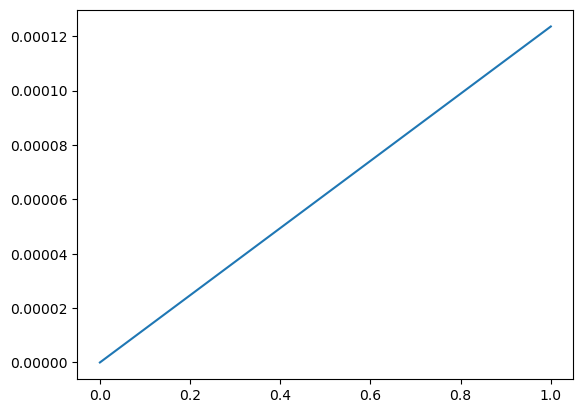

In [37]:
plt.plot(fi)
plt.savefig('./vor_variable.svg')

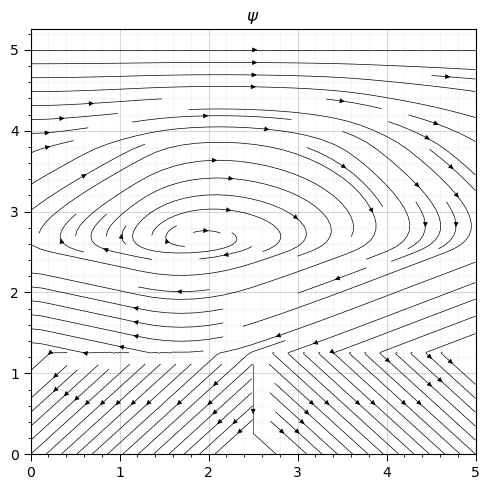

In [38]:
v = Vprom[:,:,0]
u = Vprom[:,:,1]

x = np.linspace(0, ancho, num=ancho)
y = np.linspace(0, ancho, num=alto)

X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(5, 5))

u_f = np.flipud(u)
v_f = -np.flipud(v)

ax.streamplot(X,Y, u_f, v_f, color='k', linewidth=0.5, arrowsize=0.7)  
formato_grafica(ax, fig, titulo=r'$\psi$')
plt.savefig('./vel_500000.svg')
